# Data Wrangling

### Student Name: Anthony Viscovich

In [7]:
#import any required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

#### Step 1 – Programmatically download the required data for December 2019.

In [2]:
url = 'https://nyc-tlc.s3.amazonaws.com/trip+data/green_tripdata_2019-12.csv' #provide the link to the data for December 2019

try:
    data = pd.read_csv(url) #load the data into a dataframe
    
except IOError:
    print ('Unable to read the input file.')
    exit()

C:\Users\antvi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Step 2 – Report the number of rows and columns in the data.

In [3]:
#Print the number of rows and columns in data.
data.shape

(450627, 20)

#### Step 3 – Gather summary/descriptive statistics. State your initial observations (no more than 1 paragraph) and identify any inconsistencies. 
HINT: you can use the **describe** function

In [4]:
#display the summary statistics using the describe() function from the pandas dataframe
#state your observations or any inconsistencies that were detected in step 3
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,359902.000000,359902.000000,450627.000000,450627.000000,359902.000000,450627.000000,450627.000000,450627.000000,450627.000000,450627.000000,450627.000000,0.0,450625.000000,450627.000000,359902.000000,359900.000000,359900.000000
mean,1.833449,1.102836,107.480599,128.446118,1.311582,3.445025,15.586714,0.888232,0.439677,0.949459,0.289563,NaN,0.270599,18.736671,1.477002,1.023226,0.426469
std,0.372575,0.623131,70.625075,76.086904,0.968107,117.057614,12.915723,1.166764,0.166541,2.182414,1.369154,NaN,0.091492,14.405428,0.521520,0.150620,0.995450
min,1.000000,1.000000,1.000000,1.000000,0.000000,-9436.330000,-200.000000,-4.500000,-0.500000,-90.500000,0.000000,NaN,-0.300000,-200.000000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,52.000000,64.000000,1.000000,1.040000,7.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,8.800000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,82.000000,129.000000,1.000000,1.940000,11.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,14.150000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,166.000000,192.000000,1.000000,4.000000,20.500000,1.000000,0.500000,1.560000,0.000000,NaN,0.300000,24.420000,2.000000,1.000000,0.000000
max,2.000000,6.000000,265.000000,265.000000,9.000000,77843.760000,500.000000,8.250000,3.550000,441.000000,48.000000,NaN,0.300000,500.300000,5.000000,2.000000,2.750000


#### Step 4 – Examine the data for missing observations and duplicate records. Suggest what methods are appropriate to handle them.

In [5]:
dup = data.duplicated()
print(dup)
missing = data.isnull().sum()
data.fillna(0)#Perform the action(s) in step 4 to handle any missing data and duplicate records that were found.

0         False
1         False
2         False
3         False
4         False
          ...  
450622    False
450623    False
450624    False
450625    False
450626    False
Length: 450627, dtype: bool


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.00,0.50,0.5,0.00,0.0,0.0,0.3,4.30,2.0,1.0,0.0
1,2.0,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.50,0.50,0.5,2.04,0.0,0.0,0.3,8.84,1.0,1.0,0.0
2,2.0,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.50,0.50,0.5,0.00,0.0,0.0,0.3,5.80,2.0,1.0,0.0
3,2.0,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.00,0.50,0.5,0.00,0.0,0.0,0.3,15.30,2.0,1.0,0.0
4,2.0,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.50,0.50,0.5,0.00,0.0,0.0,0.3,5.80,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450622,0.0,2019-12-31 23:26:00,2019-12-31 23:54:00,0,0.0,35,130,0.0,10.02,48.85,2.75,0.0,0.00,0.0,0.0,0.3,51.90,0.0,0.0,0.0
450623,0.0,2019-12-31 23:02:00,2019-12-31 23:16:00,0,0.0,76,61,0.0,2.27,23.31,2.75,0.0,0.00,0.0,0.0,0.3,26.36,0.0,0.0,0.0
450624,0.0,2019-12-31 23:24:00,2019-12-31 23:40:00,0,0.0,185,247,0.0,9.35,27.27,2.75,0.0,0.00,0.0,0.0,0.3,30.32,0.0,0.0,0.0
450625,0.0,2019-12-31 23:16:00,2019-12-31 23:37:00,0,0.0,51,126,0.0,-7.16,35.95,2.75,0.5,0.00,0.0,0.0,0.3,39.50,0.0,0.0,0.0


#### Step 5 – Plot a histogram showing the distribution of the trip distance. Discuss your observations (no more than 1 paragraph).

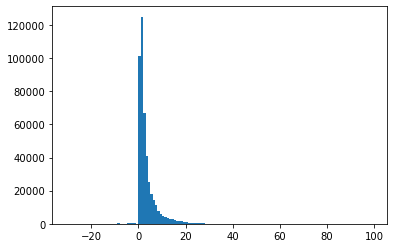

In [8]:
x = data["trip_distance"]
mp.hist(x, bins = range(-30,100))
mp.show()

#### Step 6 – Did you detect any outliers in step 5? If so, perform a suitable method to handle them?

In [9]:
Q1 = np.quantile(data["trip_distance"], 0.25)
Q3 = np.quantile(data["trip_distance"], 0.75)
IQR = Q3 - Q1

print(IQR)

min_td = Q1 - 1.5*IQR
max_td = Q3 + 1.5*IQR
print(min_td, max_td)

for i in data["trip_distance"]:
    if i not in range(-4, 9):
        del(i)
        break

2.96
-3.3999999999999995 8.44


#### Step 7 – Show the frequency of trips for each date. Do you see any interesting patterns or do you detect the need for additional data prep. rules.

In [10]:
pick_up = data["lpep_pickup_datetime"]
pick_up.value_counts()

2019-12-12 09:49:00    15
2019-12-10 13:33:00    14
2019-12-12 12:33:00    14
2019-12-06 13:57:00    14
2019-12-11 11:31:00    14
                       ..
2019-12-12 11:25:22     1
2019-12-12 11:52:45     1
2019-12-12 11:31:20     1
2019-12-12 11:03:23     1
2019-12-31 23:52:00     1
Name: lpep_pickup_datetime, Length: 355171, dtype: int64

#### Step 8 
  - (a) Create a visualization that shows how people pay for their cab rides (e.g. credit card, cash, etc.). Can you say what is the most popular mode of payment?
  - (b) Filter the data to only include customers who paid via credit card.

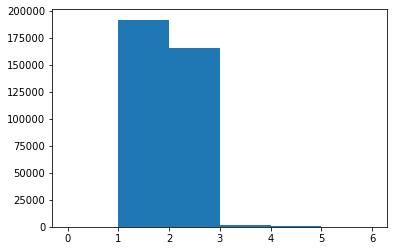

In [27]:
x = data["payment_type"]
mp.hist(x, bins = range(0,7))
mp.show()
#

#### Step 9 –  Create a compelling visualization, based on your intuition, about the data and any useful insights on what factors contribute to cab driver's gratuity. 
  For example: 
  - Is there any correlation between the pickup/drop-off location and the gratuity? 
  - Does the trip distance or duration influence gratuity?

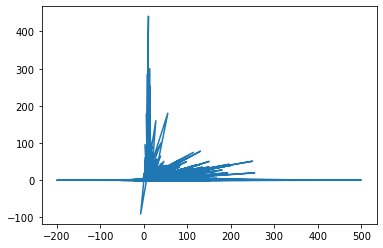

In [30]:
X = data['fare_amount']
y = data['tip_amount']

mp.plot(X,y)

mp.show()